Importing the required libraries

In [3]:
import numpy as np
import tensorflow #open source used for both ML and DL for computation
from tensorflow.keras.datasets import mnist #mnist dataset
from tensorflow.keras.models import Sequential #it is a plain stack of layers
from tensorflow.keras import layers #A Layer consists of a tensor- in tensor-out computat ion funct ion
from tensorflow.keras.layers import Dense, Flatten #Dense-Dense Layer is the regular deeply connected r
#faltten -used fot flattening the input or change the dimension
from tensorflow.keras.layers import Conv2D #onvoLutiona l Layer
from tensorflow.keras.optimizers import Adam #opt imizer
from keras. utils import np_utils #used for one-hot encoding
import matplotlib.pyplot as plt   #used for data visualization

In [4]:
(x_train, y_train), (x_test, y_test)=mnist.load_data ()
x_train=x_train.reshape (60000, 28, 28, 1).astype('float32')
x_test=x_test.reshape (10000, 28, 28, 1).astype ('float32')
number_of_classes = 10  #storing the no of classes in a variable
y_train = np_utils.to_categorical (y_train, number_of_classes) #converts the output in binary format
y_test = np_utils.to_categorical (y_test, number_of_classes)

Add CNN Layers

In [5]:
#create model
model=Sequential ()

In [6]:
#adding modeL Layer
model.add(Conv2D(64, (3, 3), input_shape=(28, 28, 1), activation='relu'))
model.add(Conv2D(32, (3, 3), activation = 'relu'))

In [7]:
#flatten the dimension of the image
model.add(Flatten())

In [8]:
#output layer with 10 neurons
model.add(Dense(number_of_classes,activation = 'softmax'))

Compiling the model

In [9]:
#Compile model
model.compile(loss= 'categorical_crossentropy', optimizer="Adam", metrics=['accuracy'])

In [10]:
x_train = np.asarray(x_train)
y_train = np.asarray(y_train)

Train the model

In [11]:
#fit the model
model.fit(x_train, y_train, validation_data=(x_test, y_test), epochs=5, batch_size=32)

Epoch 1/5
1875/1875 [==============================] - 167s 89ms/step - loss: 0.2844 - accuracy: 0.9466 - val_loss: 0.0856 - val_accuracy: 0.9726
Epoch 2/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0771 - accuracy: 0.9774 - val_loss: 0.0750 - val_accuracy: 0.9766
Epoch 3/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0544 - accuracy: 0.9831 - val_loss: 0.0933 - val_accuracy: 0.9747
Epoch 4/5
1875/1875 [==============================] - 166s 88ms/step - loss: 0.0403 - accuracy: 0.9870 - val_loss: 0.0980 - val_accuracy: 0.9736
Epoch 5/5
1875/1875 [==============================] - 165s 88ms/step - loss: 0.0307 - accuracy: 0.9901 - val_loss: 0.1148 - val_accuracy: 0.9728


Observing the metrics


In [12]:
# Final evaluation of the model
metrics = model.evaluate(x_test, y_test, verbose=0)
print("Metrics (Test loss &Test Accuracy) : ")
print(metrics)

Metrics (Test loss &Test Accuracy) : 
[0.11475896090269089, 0.9728000164031982]


In [13]:
prediction=model.predict(x_test[6000:6001])
print(prediction)

[[4.28669659e-13 3.85654812e-14 1.43829421e-10 2.91756123e-07
  1.36580575e-05 2.51653698e-09 7.34766414e-13 3.25554829e-05
  7.31408727e-05 9.99880314e-01]]


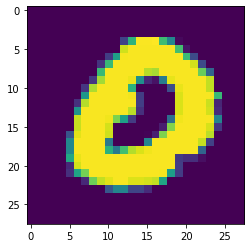

In [15]:
plt.imshow(x_test[7987])

In [16]:
import numpy as np
print(np.argmax(prediction, axis=1)) #printing our Labels from first 4 images

[9]


In [17]:
np.argmax(y_test[5100:5101]) #printing the actual labels

9

Save The model

In [18]:
# Save the model
model.save('models/mnistCNN.h5')

In [19]:
cd models

/home/wsuser/work/models


In [20]:
!tar -zcvf hdr_deployment.tgz mnistCNN.h5

mnistCNN.h5


In [21]:
ls -1

hdr_deployment.tgz
mnistCNN.h5


In [22]:
!pip install watson-machine-learning-client --upgrade

     |████████████████████████████████| 538 kB 17.3 MB/s eta 0:00:01


In [23]:
from ibm_watson_machine_learning import APIClient
credentials ={
    "url":"https://us-south.ml.cloud.ibm.com",
    "apikey":"sChLJQZr4O1qPT1FJmTt_17kjdbbofyoAipv-mCFWnD_"
}
client = APIClient(credentials)
client

In [24]:
client.spaces.get_details()

{'resources': []}

In [25]:
def guid_from_space_name(client,deploy):
  space = client.spaces.get_details()
  return (next(item for item in space['resources'] if item['entity']['name']==deploy)['metadata']['id'])

In [27]:
space_uid = guid_from_space_name(client,'HDR')
print("Space UID = " + space_uid)

Space UID = 30ef42c9-b756-4a56-afbc-77bdadab52e6


In [28]:
client.set.default_space(space_uid)

'SUCCESS'

In [29]:
client.software_specifications.list(limit=100)

-------------------------------  ------------------------------------  ----
NAME                             ASSET_ID                              TYPE
default_py3.6                    0062b8c9-8b7d-44a0-a9b9-46c416adcbd9  base
kernel-spark3.2-scala2.12        020d69ce-7ac1-5e68-ac1a-31189867356a  base
pytorch-onnx_1.3-py3.7-edt       069ea134-3346-5748-b513-49120e15d288  base
scikit-learn_0.20-py3.6          09c5a1d0-9c1e-4473-a344-eb7b665ff687  base
spark-mllib_3.0-scala_2.12       09f4cff0-90a7-5899-b9ed-1ef348aebdee  base
pytorch-onnx_rt22.1-py3.9        0b848dd4-e681-5599-be41-b5f6fccc6471  base
ai-function_0.1-py3.6            0cdb0f1e-5376-4f4d-92dd-da3b69aa9bda  base
shiny-r3.6                       0e6e79df-875e-4f24-8ae9-62dcc2148306  base
tensorflow_2.4-py3.7-horovod     1092590a-307d-563d-9b62-4eb7d64b3f22  base
pytorch_1.1-py3.6                10ac12d6-6b30-4ccd-8392-3e922c096a92  base
tensorflow_1.15-py3.6-ddl        111e41b3-de2d-5422-a4d6-bf776828c4b7  base
autoai-kb_rt

In [30]:
software_space_uid = client.software_specifications.get_uid_by_name('tensorflow_rt22.1-py3.9')
software_space_uid

'acd9c798-6974-5d2f-a657-ce06e986df4d'

In [33]:
model_details = client.repository.store_model(model='hdr_deployment.tgz',meta_props={
    client.repository.ModelMetaNames.NAME:"Handwritten Digit Recognition System",
    client.repository.ModelMetaNames.TYPE:"tensorflow_2.7",
    client.repository.ModelMetaNames.SOFTWARE_SPEC_UID:software_space_uid
})

In [34]:
model_details

{'entity': {'hybrid_pipeline_software_specs': [],
  'software_spec': {'id': 'acd9c798-6974-5d2f-a657-ce06e986df4d',
   'name': 'tensorflow_rt22.1-py3.9'},
  'type': 'tensorflow_2.7'},
 'metadata': {'created_at': '2022-11-19T18:34:04.666Z',
  'id': '500d4464-092e-42a3-9970-a08b7b04bde3',
  'modified_at': '2022-11-19T18:34:07.872Z',
  'name': 'Handwritten Digit Recognition System',
  'owner': 'IBMid-668000F2G7',
  'resource_key': 'af3e1558-7566-4a38-afff-87bd39f99d43',
  'space_id': '30ef42c9-b756-4a56-afbc-77bdadab52e6'},
 'system': {'warnings': []}}

In [35]:
model_id = client.repository.get_model_id(model_details)
model_id

'500d4464-092e-42a3-9970-a08b7b04bde3'

In [36]:
client.repository.download(model_id,'DigitRecognition_IBM_model.tar.gz')

Successfully saved model content to file: 'DigitRecognition_IBM_model.tar.gz'


'/home/wsuser/work/models/DigitRecognition_IBM_model.tar.gz'

In [37]:
ls

DigitRecognition_IBM_model.tar.gz  hdr_deployment.tgz  mnistCNN.h5


# TEST MODEL